<a href="https://colab.research.google.com/github/hakivin/rock-paper-scissor-CNN/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-01 20:54:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.6MB/s    in 30s     

2020-05-01 20:54:56 (10.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile, os

In [0]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [0]:
os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

In [0]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), 
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 6s - loss: 1.0103 - accuracy: 0.5342 - val_loss: 0.7590 - val_accuracy: 0.6719
Epoch 2/20
32/32 - 6s - loss: 0.4426 - accuracy: 0.8443 - val_loss: 0.2760 - val_accuracy: 0.9061
Epoch 3/20
32/32 - 6s - loss: 0.2858 - accuracy: 0.8936 - val_loss: 0.1703 - val_accuracy: 0.9336
Epoch 4/20
32/32 - 6s - loss: 0.2532 - accuracy: 0.9172 - val_loss: 0.1448 - val_accuracy: 0.9429
Epoch 5/20
32/32 - 6s - loss: 0.1809 - accuracy: 0.9326 - val_loss: 0.1680 - val_accuracy: 0.9551
Epoch 6/20
32/32 - 6s - loss: 0.1446 - accuracy: 0.9567 - val_loss: 0.1531 - val_accuracy: 0.9414
Epoch 7/20
32/32 - 6s - loss: 0.1440 - accuracy: 0.9527 - val_loss: 0.1238 - val_accuracy: 0.9633
Epoch 8/20
32/32 - 6s - loss: 0.1431 - accuracy: 0.9600 - val_loss: 0.1240 - val_accuracy: 0.9429
Epoch 9/20
32/32 - 6s - loss: 0.1052 - accuracy: 0.9626 - val_loss: 0.1441 - val_accuracy: 0.9492
Epoch 10/20
32/32 - 6s - loss: 0.1012 - accuracy: 0.9668 - val_loss: 0.1334 - val_accuracy: 0.9633
Epoch 11/20
32/32 -

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving test scissors 2.jpg to test scissors 2 (1).jpg
test scissors 2.jpg
scissors


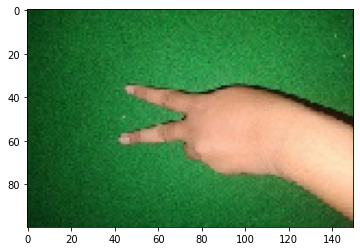

In [0]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')